### Your objective is to build a Bubble Plot that showcases the relationship between four key variables:
* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)

### In addition, you will be expected to produce the following three pie charts:
* % of Total Fares by City Type
* % of Total Rides by City Type
* % of Total Drivers by City Type

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
# import seaborn as sns
from pandas.tools.plotting import table

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"
# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load, low_memory=False)
ride_df = pd.read_csv(ride_data_to_load, low_memory=False)
# Combine the data into a single dataset of city information
pyber_df = pd.merge(ride_df, city_df, on="city", how="outer")
# Create a dict of city type
city_type = pyber_df["type"].unique()
city_type

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [2]:
# Group city in the dataframe and do not sort the result
city_gb = pyber_df.groupby(["city"],sort=False).first()
city_gb.head()

,date,fare,ride_id,driver_count,type
city,,,,,
Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [3]:
# Create a dataframe of the combined data
cmb_df = pd.DataFrame(pyber_df)
# Group the data on type and city
city_grp_df = cmb_df.groupby(["type", "city"])
# For the group create two col to hold fare count and fare mean value
city_fare_df = round(city_grp_df.fare.agg(["count","mean"]),0)
# Rename the two col as follows:
city_fare_df.columns = ["Number of Rides", "Average Fare per Ride"]
# Create a new col for the percentage value of rides
city_fare_df["% of Total Rides"] = round(city_fare_df["Number of Rides"] / 
                                         sum(city_fare_df["Number of Rides"]) * 100, 2)
# Create a new col for the percentage value of fares
city_fare_df["% of Total Fares"] = round(city_fare_df["Average Fare per Ride"] / 
                                         sum(city_fare_df["Average Fare per Ride"]) * 100, 2)

In [16]:
# separate data by city type
rural = city_fare_df.loc["Rural" , :]
urban = city_fare_df.loc["Urban" , :]
suburban = city_fare_df.loc["Suburban" , :]
city_fare_df
# rural

Number of Rides  Average Fare per Ride  \
type     city                                                           
Rural    Bradshawfurt                       10                   40.0   
         Garzaport                           3                   24.0   
         Harringtonfort                      6                   33.0   
         Jessicaport                         6                   36.0   
         Lake Jamie                          6                   34.0   
         Lake Latoyabury                    11                   26.0   
         Michaelberg                        12                   35.0   
         New Ryantown                        6                   43.0   
         Newtonview                          4                   37.0   
         North Holly                         9                   29.0   
         North Jaime                         8                   31.0   
         Penaborough                         5                   35.0   
         Randallchester                      5                   30.0   
         South Jennifer                      7                   35.0   
         South Marychester                   8                   42.0   
         South Saramouth                     4                   36.0   
         Taylorhaven                         6                   42.0   
         West Heather                        9                   34.0   
Suburban Barronchester                      16                   36.0   
         Bethanyland                        18                   33.0   
         Brandonfort                        19                   35.0   
         Colemanland                        22                   31.0   
         Davidfurt                          17                   32.0   
         East Aaronbury                      9                   26.0   
         East Danielview                    17                   32.0   
         East Kentstad                      13                   30.0   
         East Marymouth                     27                   31.0   
         Grayville                          15                   28.0   
         Josephside                         27                   33.0   
         Lake Ann                           12                   31.0   
...                                        ...                    ...   
Urban    Port Johnbury                      22                   23.0   
         Port Samanthamouth                 25                   26.0   
         Raymondhaven                       25                   21.0   
         Reynoldsfurt                       19                   22.0   
         Richardfort                        28                   22.0   
         Roberthaven                        24                   24.0   
         Robertport                         20                   23.0   
         Rodneyfort                         23                   29.0   
         Rogerston                          22                   22.0   
         Royland                            30                   21.0   
         Simpsonburgh                       24                   23.0   
         South Evanton                      31                   27.0   
         South Jack                         19                   23.0   
         South Karenland                    38                   27.0   
         South Latoya                       19                   20.0   
         South Michelleport                 31                   24.0   
         South Phillip                      31                   29.0   
         Valentineton                       22                   25.0   
         West Angela                        39                   26.0   
         West Anthony                       30                   25.0   
         West Christopherberg               26                   24.0   
         West Ericstad                      18                   22.0   
         West Ga

In [5]:
# Create a dataframe for driver stats
cmb_df = pd.DataFrame(pyber_df)
# Remove duplicate city
driver_df = cmb_df.drop_duplicates("city")
# sum up drive count
driver_count = driver_df["driver_count"]

## Bubble Plot of Ride Sharing Data

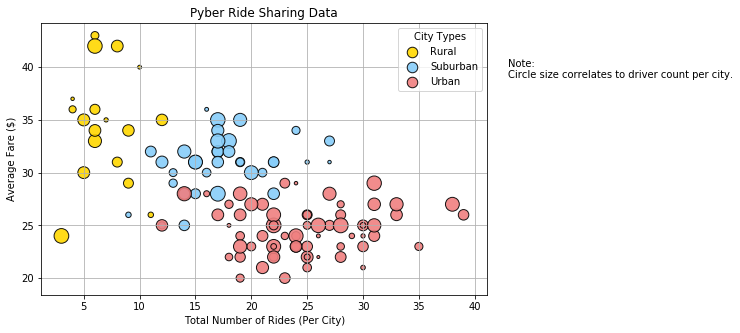

In [6]:
# Obtain the x and y coordinates for each of the three city types
x_axis1 = rural["Number of Rides"]
y_axis1 = rural["Average Fare per Ride"]
x_axis2 = suburban["Number of Rides"]
y_axis2 = suburban["Average Fare per Ride"]
x_axis3 = urban["Number of Rides"]
y_axis3 = urban["Average Fare per Ride"]
# Store plot 's' value
driver_value = driver_count*3
# Build the scatter plots for each city types
plt.figure(figsize=(8,5))
plt.scatter(x_axis1, y_axis1, marker="o", color="gold", edgecolors="black",
            s=driver_value, alpha=0.9)
plt.scatter(x_axis2, y_axis2, marker="o", color="lightskyblue", edgecolors="black",
            s=driver_value, alpha=0.9)
plt.scatter(x_axis3, y_axis3, marker="o", color="lightcoral", edgecolors="black",
            s=driver_value, alpha=0.9)
# These are the other graph 
# plt.ylim(18,50)
# plt.xlim(0,40)
plt.text(43, 40, r'Note:', fontsize=10)
plt.text(43, 39, r'Circle size correlates to driver count per city.', fontsize=10)
plt.grid(True)
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
# Create a legend
plt.legend(labels=('Rural','Suburban','Urban'), loc='best', title='City Types')
# Incorporate a text label regarding circle size
plt.style.use('classic')
# Save Figure
plt.savefig('results/bubble.png')

In [7]:
# Show plot
plt.show()

## Total Fares by City Type

In [8]:
# Calculate Type Percents
# Create a new dataframe from original combined data
# cmb_df = pd.DataFrame(pyber_df)
# Pull data for type only, used later for charting
cmb_type_df = cmb_df.groupby(["type"])
# Create three new columns for each group of rural, suburban and urban
city_type_df = round(cmb_type_df.fare.agg(["count","sum","mean"]),0)
# Replace the above three column with more meaningful titles
city_type_df.columns = ["Number of Rides", "Total Revenue of Fares", "Average Fare per Ride"]
# Create a new col for the calulated percentage of riders by city type
city_type_df["% of Total Rides"] = round(city_type_df["Number of Rides"] / 
                                         sum(city_type_df["Number of Rides"]) * 100, 2)
# Create a new col for the calulated percentage of total fare by city type
city_type_df["% of Total Fares"] = round(city_type_df["Total Revenue of Fares"] / 
                                         sum(city_type_df["Total Revenue of Fares"]) * 100, 2)
# Build Pie Chart
# Labels for the sections of our pie chart
labels = city_type_df.index.values

# The values of each section of the pie chart
sizes =city_type_df["% of Total Fares"]

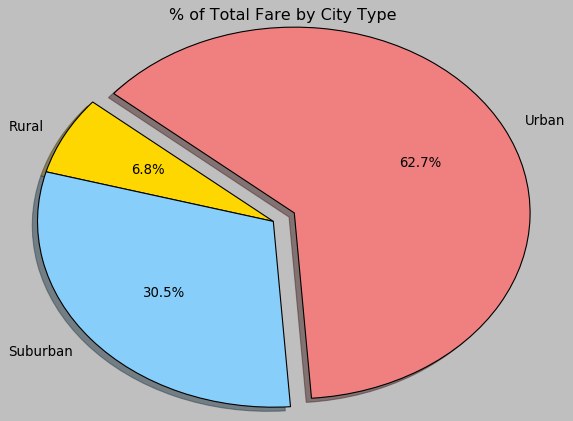

In [9]:
# Show Figure
# The colors of each section of the pie chart
colors = ['gold','lightskyblue','lightcoral']

explode = [0,0,0.1]
plt.title("% of Total Fare by City Type")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("tight")
# Save Figure
plt.savefig('results/totalfares.png')
plt.show()

## Total Rides by City Type

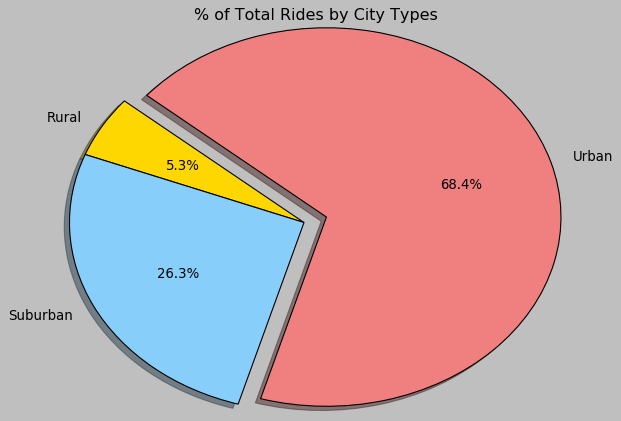

In [10]:
# Calculate Ride Percents
# Labels for the sections of our pie chart
labels = city_type_df.index.values

# Build Pie Chart
# The values of each section of the pie chart
sizes =city_type_df["% of Total Rides"]

# The colors of each section of the pie chart
colors = ['gold','lightskyblue','lightcoral']

explode = [0,0,0.1]
plt.title("% of Total Rides by City Types")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("tight")

# Save Figure
plt.savefig("results/totalrides.png")
plt.show()

In [11]:
# Show Figure
plt.show()

## Total Drivers by City Type

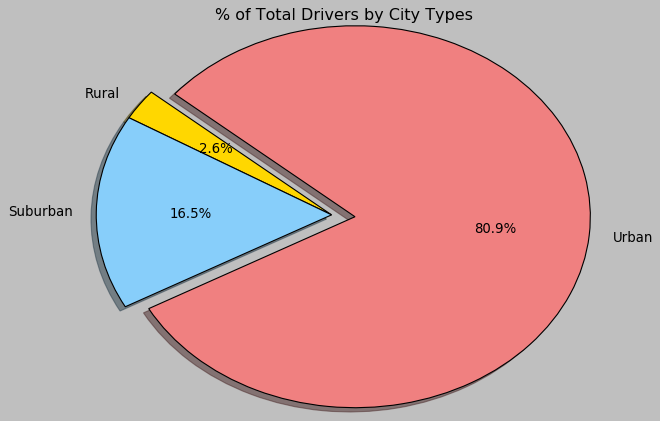

In [12]:
# Calculate Driver Percents
#find the total number of drivers per city
# cmb_df = pd.DataFrame(pyber_df)
driver_drop_df = cmb_df.drop_duplicates("city")
# driver_drop_df.head()
# driver_drop_df.head(126)
driver_drop_df = driver_drop_df.groupby("type")
# driver_drop_df.head(200)
driver_count_df = driver_drop_df.driver_count.agg(["sum", "count"])
# driver_count_df.head()
driver_count_df.columns = ["Drivers by City Type", "City Count"]
# driver_count_df.head()
driver_count_df["% of Drivers Count"] = round(driver_count_df["Drivers by City Type"] / 
                                              sum(driver_count_df["Drivers by City Type"]) * 100, 2)
# Build Pie Charts
# Labels for the sections of our pie chart
labels = driver_count_df.index.values
# The values of each section of the pie chart
sizes =driver_count_df["% of Drivers Count"]

# The colors of each section of the pie chart
colors = ['gold','lightskyblue','lightcoral']

explode = [0,0,0.1]
plt.title("% of Total Drivers by City Types")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("tight")
# Save Figure
plt.savefig("results/totaldrivers.png")
plt.show()

In [13]:
# Show Figure
plt.show()

#### Three observable trends:
1. Suburban rides make up only 26% of all rides, but the average fare is higher than that in cities and a third of the combined revenue.
2. Rural area fares are the most expensive ones - the average fare is almost 10 dollar higher compared to urban city fare. 
3. Urban areas account for 80 percent of all Pyber drivers and 68% of all Pyber rides.
